In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 

In [ ]:
business_json_path = 'data/yelp_academic_dataset_business.json'
data_business = pd.read_json(business_json_path, lines=True)

In [ ]:
data_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [ ]:
drop_columns = ['hours','is_open']
data_business = data_business.drop(drop_columns, axis=1)

In [ ]:
data_explode = data_business.assign(categories = data_business.categories.str.split(', ')).explode('categories')

In [ ]:
print('total number of businesses:', len(data_business))
print('total number of categories:', len(data_explode.categories.value_counts()))
print('Top 10 categories:')
cat = data_explode.categories.value_counts()[:10]
print(cat)

total number of businesses: 209393
total number of categories: 1336
Top 10 categories:
Restaurants         63944
Shopping            34644
Food                32991
Home Services       22487
Beauty & Spas       20520
Health & Medical    19227
Local Services      15783
Automotive          14720
Nightlife           14211
Bars                12400
Name: categories, dtype: int64


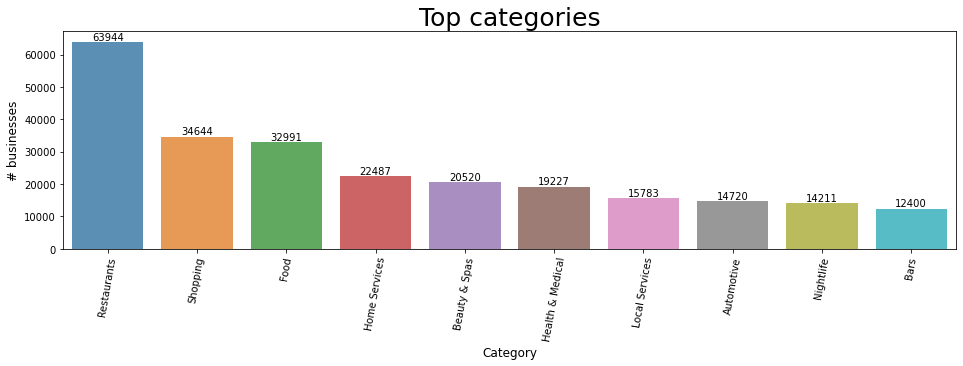

In [ ]:
#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x = cat.index, y = cat.values, alpha=0.8)
plt.title("Top categories",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = cat.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
data_explode[data_explode['categories'].str.contains('Restaurants', case=True, na=False)].categories.value_counts()

Restaurants           63944
Pop-Up Restaurants       22
Name: categories, dtype: int64

In [ ]:
business_Restaurants = data_business[data_business['categories'].str.contains(
              'Restaurants|Pop-Up Restaurants', case=False, na=False)]

In [ ]:
business_Restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo..."
20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,"{'RestaurantsGoodForGroups': 'True', 'OutdoorS...","Food, Restaurants, Grocery, Middle Eastern"
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries"
25,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Japanese, Fast Food, Food Court, Restaurants"
30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,"{'Ambience': '{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest..."


In [ ]:
review_json_path = 'data/yelp_academic_dataset_review.json'
size = 100000
data_reviews = pd.read_json(review_json_path, lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

In [ ]:
# There are multiple chunks to be read
chunk_list = []
for chunk_review in data_reviews:
    # Drop columns that aren't needed
    chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis=1)
    # Renaming column name to avoid conflict with business overall star rating
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    # Inner merge with edited business file so only reviews related to the business remain
    chunk_merged = pd.merge(business_Restaurants, chunk_review, on='business_id', how='inner')
    # Show feedback on progress
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
# After trimming down the review file, concatenate all relevant data back to one dataframe
dataset = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

66696 out of 100,000 related reviews
66723 out of 100,000 related reviews
66664 out of 100,000 related reviews
66746 out of 100,000 related reviews
63870 out of 100,000 related reviews
60793 out of 100,000 related reviews
53712 out of 100,000 related reviews
55479 out of 100,000 related reviews
66735 out of 100,000 related reviews
67003 out of 100,000 related reviews
66731 out of 100,000 related reviews
67119 out of 100,000 related reviews
63322 out of 100,000 related reviews
60530 out of 100,000 related reviews
53925 out of 100,000 related reviews
55906 out of 100,000 related reviews
66007 out of 100,000 related reviews
65851 out of 100,000 related reviews
65880 out of 100,000 related reviews
66202 out of 100,000 related reviews
63432 out of 100,000 related reviews
57321 out of 100,000 related reviews
53829 out of 100,000 related reviews
54922 out of 100,000 related reviews
67424 out of 100,000 related reviews
67549 out of 100,000 related reviews
67382 out of 100,000 related reviews
6

In [ ]:
csv_name = "data/yelp_reviews_Restaurants.csv"
dataset.to_csv(csv_name, index=False)

In [ ]:
restau_path = 'data/yelp_reviews_Restaurants.csv'
data_restaurant = pd.read_csv(restau_path)

In [ ]:
data_restaurant = data_restaurant.sort_values(by = ['name', 'business_id'], ascending = True)

In [ ]:
len(data_restaurant)

5055992

In [ ]:
data_restaurant.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,user_id,review_stars,text,date
1000940,AUwEs6MUl3-9AlCh-PEAZQ,China,1726 Ebenezer Rd,Rock Hill,SC,29732,34.958043,-81.046224,3.0,10,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Chinese",CJV6gZsjfujY69XLcErZEA,4,"Been going here for years, it's my 'neighborho...",2014-01-18 00:15:11
1064536,AUwEs6MUl3-9AlCh-PEAZQ,China,1726 Ebenezer Rd,Rock Hill,SC,29732,34.958043,-81.046224,3.0,10,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Chinese",AGlnF9NKYE-QLqHO4D75aw,4,Very good chinese food to go. Inside has absol...,2011-08-31 18:50:06
1064537,AUwEs6MUl3-9AlCh-PEAZQ,China,1726 Ebenezer Rd,Rock Hill,SC,29732,34.958043,-81.046224,3.0,10,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Chinese",cx4-WfPgm1Jxurtd83I83g,3,Just what you'd expect from a Chinese food gra...,2011-09-30 13:29:42
1196257,AUwEs6MUl3-9AlCh-PEAZQ,China,1726 Ebenezer Rd,Rock Hill,SC,29732,34.958043,-81.046224,3.0,10,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Chinese",O4BROgwxEgX4pzqsvRXBYg,1,Horrible fried rice. Probably the absolute wor...,2018-04-09 16:19:22
1196258,AUwEs6MUl3-9AlCh-PEAZQ,China,1726 Ebenezer Rd,Rock Hill,SC,29732,34.958043,-81.046224,3.0,10,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Chinese",uzZwaZg0p75JStXNTB_8EA,1,We just placed a Take Out order and our servic...,2016-05-01 19:21:27


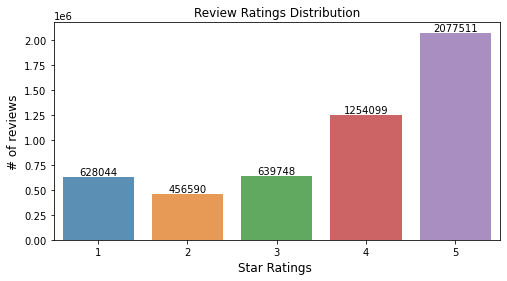

In [ ]:
#Get the distribution of the ratings
x=data_restaurant['review_stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x = x.index, y = x.values, alpha=0.8)
plt.title("Review Ratings Distribution")
plt.ylabel('# of reviews', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [ ]:
data_restaurant = data_restaurant.set_index(pd.Index(range(0,5055992)))

In [ ]:
data_restaurant.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,user_id,review_stars,text,date
0,AUwEs6MUl3-9AlCh-PEAZQ,China,1726 Ebenezer Rd,Rock Hill,SC,29732,34.958043,-81.046224,3.0,10,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Chinese",CJV6gZsjfujY69XLcErZEA,4,"Been going here for years, it's my 'neighborho...",2014-01-18 00:15:11
1,AUwEs6MUl3-9AlCh-PEAZQ,China,1726 Ebenezer Rd,Rock Hill,SC,29732,34.958043,-81.046224,3.0,10,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Chinese",AGlnF9NKYE-QLqHO4D75aw,4,Very good chinese food to go. Inside has absol...,2011-08-31 18:50:06
2,AUwEs6MUl3-9AlCh-PEAZQ,China,1726 Ebenezer Rd,Rock Hill,SC,29732,34.958043,-81.046224,3.0,10,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Chinese",cx4-WfPgm1Jxurtd83I83g,3,Just what you'd expect from a Chinese food gra...,2011-09-30 13:29:42
3,AUwEs6MUl3-9AlCh-PEAZQ,China,1726 Ebenezer Rd,Rock Hill,SC,29732,34.958043,-81.046224,3.0,10,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Chinese",O4BROgwxEgX4pzqsvRXBYg,1,Horrible fried rice. Probably the absolute wor...,2018-04-09 16:19:22
4,AUwEs6MUl3-9AlCh-PEAZQ,China,1726 Ebenezer Rd,Rock Hill,SC,29732,34.958043,-81.046224,3.0,10,"{'Ambience': ""{'romantic': False, 'intimate': ...","Restaurants, Chinese",uzZwaZg0p75JStXNTB_8EA,1,We just placed a Take Out order and our servic...,2016-05-01 19:21:27


In [ ]:
csv_name2 = "data/yelp_reviews_Restaurants_v2.csv"
data_restaurant.to_csv(csv_name2, index=False)